In [140]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings as wr
wr.filterwarnings(action="ignore")
import seaborn as sns

In [142]:
account = pd.read_csv("/content/drive/MyDrive/archive-3/Customer Profiles/account_activity.csv")
customer = pd.read_csv("/content/drive/MyDrive/archive-3/Customer Profiles/customer_data.csv")
fraud = pd.read_csv("/content/drive/MyDrive/archive-3/Fraudulent Patterns/fraud_indicators.csv")
suspision = pd.read_csv("/content/drive/MyDrive/archive-3/Fraudulent Patterns/suspicious_activity.csv")
merchant = pd.read_csv("/content/drive/MyDrive/archive-3/Merchant Information/merchant_data.csv")
tran_cat = pd.read_csv("/content/drive/MyDrive/archive-3/Merchant Information/transaction_category_labels.csv")
amount = pd.read_csv("/content/drive/MyDrive/archive-3/Transaction Amounts/amount_data.csv")
anamoly = pd.read_csv("/content/drive/MyDrive/archive-3/Transaction Amounts/anomaly_scores.csv")
tran_data = pd.read_csv("/content/drive/MyDrive/archive-3/Transaction Data/transaction_metadata.csv")
tran_rec = pd.read_csv("/content/drive/MyDrive/archive-3/Transaction Data/transaction_records.csv")

In [143]:
data = [account,customer,fraud,suspision,merchant,tran_cat,amount,anamoly,tran_data,tran_rec]

In [144]:
for df in data:
    print(df.head()) ##forloop

   CustomerID  AccountBalance   LastLogin
0        1001     9507.272060  2022-01-01
1        1002     7408.704536  2022-01-02
2        1003     1715.321989  2022-01-03
3        1004     3101.509134  2022-01-04
4        1005     5405.766914  2022-01-05
   CustomerID           Name  Age       Address
0        1001  Customer 1001   54  Address 1001
1        1002  Customer 1002   35  Address 1002
2        1003  Customer 1003   40  Address 1003
3        1004  Customer 1004   30  Address 1004
4        1005  Customer 1005   46  Address 1005
   TransactionID  FraudIndicator
0              1               0
1              2               0
2              3               0
3              4               0
4              5               0
   CustomerID  SuspiciousFlag
0        1001               0
1        1002               0
2        1003               0
3        1004               0
4        1005               0
   MerchantID   MerchantName       Location
0        2001  Merchant 2001  Location

In [145]:
costumer_data = pd.merge(customer, account, on='CustomerID')
costumer_data = pd.merge(costumer_data, suspision, on='CustomerID')
costumer_data

,CustomerID,Name,Age,Address,AccountBalance,LastLogin,SuspiciousFlag
0,1001,Customer 1001,54,Address 1001,9507.272060,2022-01-01,0
1,1002,Customer 1002,35,Address 1002,7408.704536,2022-01-02,0
2,1003,Customer 1003,40,Address 1003,1715.321989,2022-01-03,0
3,1004,Customer 1004,30,Address 1004,3101.509134,2022-01-04,0
4,1005,Customer 1005,46,Address 1005,5405.766914,2022-01-05,0
...,...,...,...,...,...,...,...
995,1996,Customer 1996,33,Address 1996,8523.485163,2024-09-22,0
996,1997,Customer 1997,58,Address 1997,9255.451757,2024-09-23,0
997,1998,Customer 1998,25,Address 1998,9148.652759,2024-09-24,0
998,1999,Customer 1999,57,Address 1999,7376.854107,2024-09-25,0


In [146]:
transaction_data1 = pd.merge(fraud, tran_cat, on="TransactionID")
transaction_data2 = pd.merge(amount, anamoly, on="TransactionID")
transaction_data3 = pd.merge(tran_data, tran_rec, on="TransactionID")
transaction_data = pd.merge(transaction_data1, transaction_data2,on="TransactionID")
transaction_data = pd.merge(transaction_data, transaction_data3,on="TransactionID")

In [147]:
transaction_data

,TransactionID,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,MerchantID,Amount,CustomerID
0,1,0,Other,79.413607,0.686699,2022-01-01 00:00:00,2701,55.530334,1952
1,2,0,Online,12.053087,0.081749,2022-01-01 01:00:00,2070,12.881180,1027
2,3,0,Travel,33.310357,0.023857,2022-01-01 02:00:00,2238,50.176322,1955
3,4,0,Travel,46.121117,0.876994,2022-01-01 03:00:00,2879,41.634001,1796
4,5,0,Other,54.051618,0.034059,2022-01-01 04:00:00,2966,78.122853,1946
...,...,...,...,...,...,...,...,...,...
995,996,0,Food,89.457059,0.266778,2022-02-11 11:00:00,2150,19.876750,1411
996,997,0,Retail,47.958030,0.512483,2022-02-11 12:00:00,2888,96.299792,1566
997,998,0,Food,64.210046,0.367740,2022-02-11 13:00:00,2037,75.164459,1654
998,999,0,Travel,64.684167,0.960364,2022-02-11 14:00:00,2629,93.633040,1928


**Data Exploration**

In [148]:
data = pd.merge(transaction_data, costumer_data,on="CustomerID")
data

,TransactionID,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,MerchantID,Amount,CustomerID,Name,Age,Address,AccountBalance,LastLogin,SuspiciousFlag
0,1,0,Other,79.413607,0.686699,2022-01-01 00:00:00,2701,55.530334,1952,Customer 1952,50,Address 1952,2869.689912,2024-08-09,0
1,2,0,Online,12.053087,0.081749,2022-01-01 01:00:00,2070,12.881180,1027,Customer 1027,46,Address 1027,9527.947107,2022-01-27,0
2,3,0,Travel,33.310357,0.023857,2022-01-01 02:00:00,2238,50.176322,1955,Customer 1955,34,Address 1955,9288.355525,2024-08-12,0
3,4,0,Travel,46.121117,0.876994,2022-01-01 03:00:00,2879,41.634001,1796,Customer 1796,33,Address 1796,5588.049942,2024-03-06,0
4,5,0,Other,54.051618,0.034059,2022-01-01 04:00:00,2966,78.122853,1946,Customer 1946,18,Address 1946,7324.785332,2024-08-03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,Food,89.457059,0.266778,2022-02-11 11:00:00,2150,19.876750,1411,Customer 1411,19,Address 1411,1290.323059,2023-02-15,0
996,997,0,Retail,47.958030,0.512483,2022-02-11 12:00:00,2888,96.299792,1566,Customer 1566,39,Address 1566,7067.831609,2023-07-20,0
997,998,0,Food,64.210046,0.367740,2022-02-11 13:00:00,2037,75.164459,1654,Customer 1654,51,Address 1654,9088.738359,2023-10-16,0
998,999,0,Travel,64.684167,0.960364,2022-02-11 14:00:00,2629,93.633040,1928,Customer 1928,60,Address 1928,9352.655675,2024-07-16,0


In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionID      1000 non-null   int64  
 1   FraudIndicator     1000 non-null   int64  
 2   Category           1000 non-null   object 
 3   TransactionAmount  1000 non-null   float64
 4   AnomalyScore       1000 non-null   float64
 5   Timestamp          1000 non-null   object 
 6   MerchantID         1000 non-null   int64  
 7   Amount             1000 non-null   float64
 8   CustomerID         1000 non-null   int64  
 9   Name               1000 non-null   object 
 10  Age                1000 non-null   int64  
 11  Address            1000 non-null   object 
 12  AccountBalance     1000 non-null   float64
 13  LastLogin          1000 non-null   object 
 14  SuspiciousFlag     1000 non-null   int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 117.3+ KB


In [150]:
data.describe()

,TransactionID,FraudIndicator,TransactionAmount,AnomalyScore,MerchantID,Amount,CustomerID,Age,AccountBalance,SuspiciousFlag
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.045000,55.853826,0.492282,2504.701000,55.394871,1496.626000,39.848000,5715.455931,0.025000
std,288.819436,0.207408,26.093606,0.288423,288.414883,25.070809,289.229047,13.074932,2540.517262,0.156203
min,1.000000,0.000000,10.057864,0.000234,2001.000000,10.006933,1001.000000,18.000000,1056.301181,0.000000
25%,250.750000,0.000000,33.875129,0.251802,2254.500000,34.502315,1239.000000,29.000000,3489.554711,0.000000
50%,500.500000,0.000000,55.958313,0.490242,2500.500000,57.844325,1501.000000,39.000000,5753.007775,0.000000
75%,750.250000,0.000000,77.589391,0.741888,2761.250000,75.858576,1739.250000,51.000000,7925.710167,0.000000
max,1000.000000,1.000000,99.784323,0.999047,3000.000000,99.887410,2000.000000,64.000000,9999.776239,1.000000


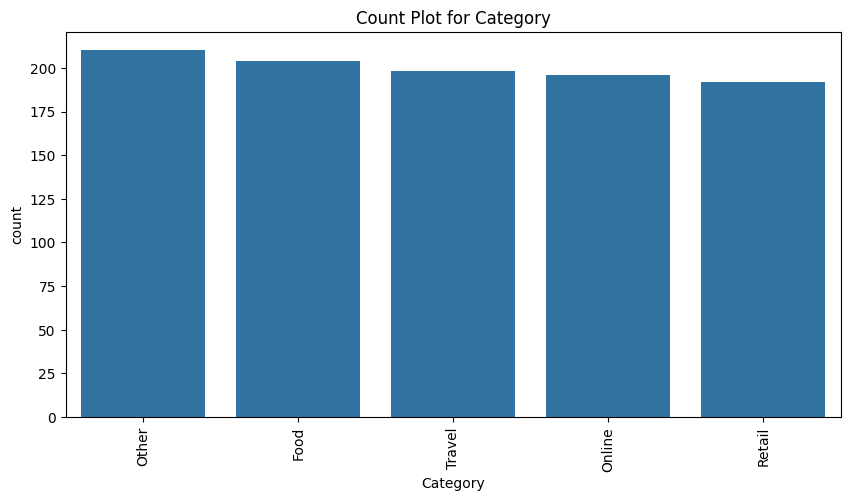

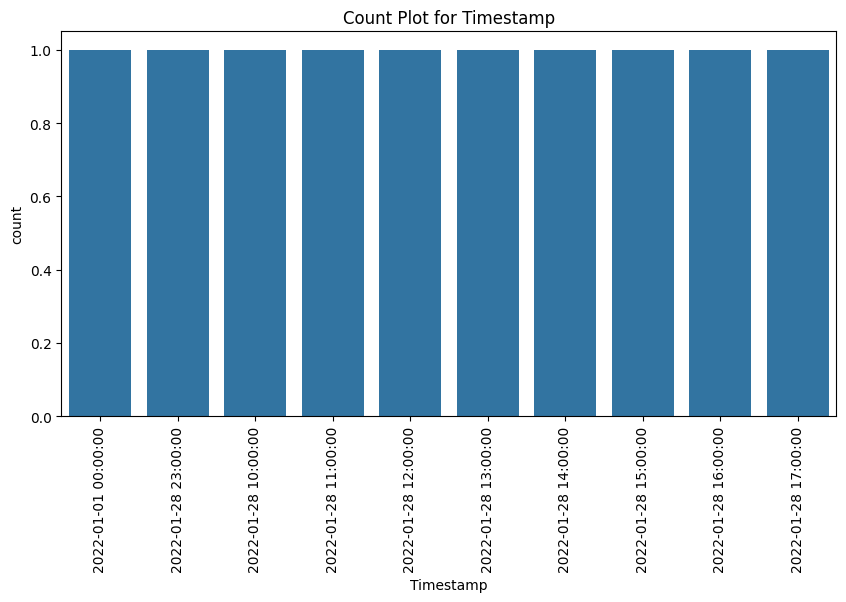

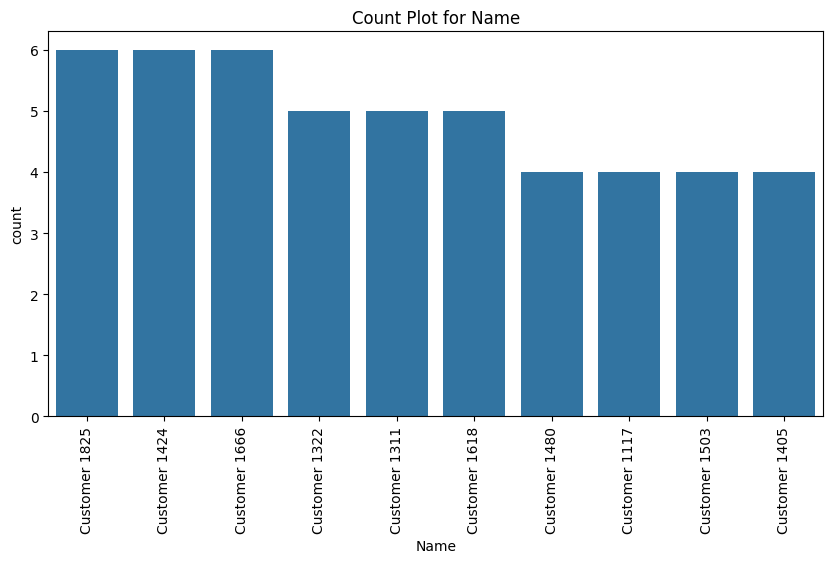

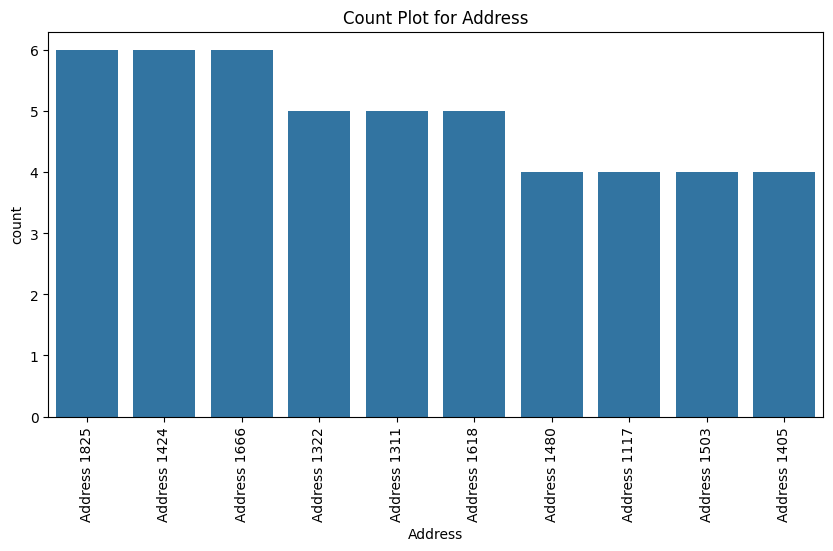

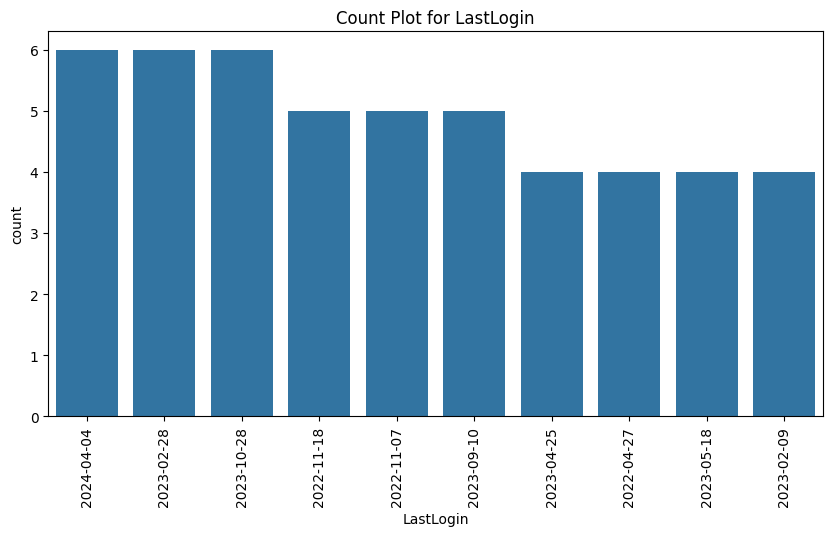

In [151]:
for column in data.columns:
    if data[column].dtype == 'object':  # Check if the column has a categorical data type
        top_10_values = data[column].value_counts().head(10)  # Get the first 10 unique values and their counts
        plt.figure(figsize=(10, 5))  # Adjust the figure size if needed
        sns.countplot(x=column, data=data, order=top_10_values.index)
        plt.title(f'Count Plot for {column}')
        plt.xticks(rotation=90)  # Rotate x-axis labels if they are long
        plt.show()


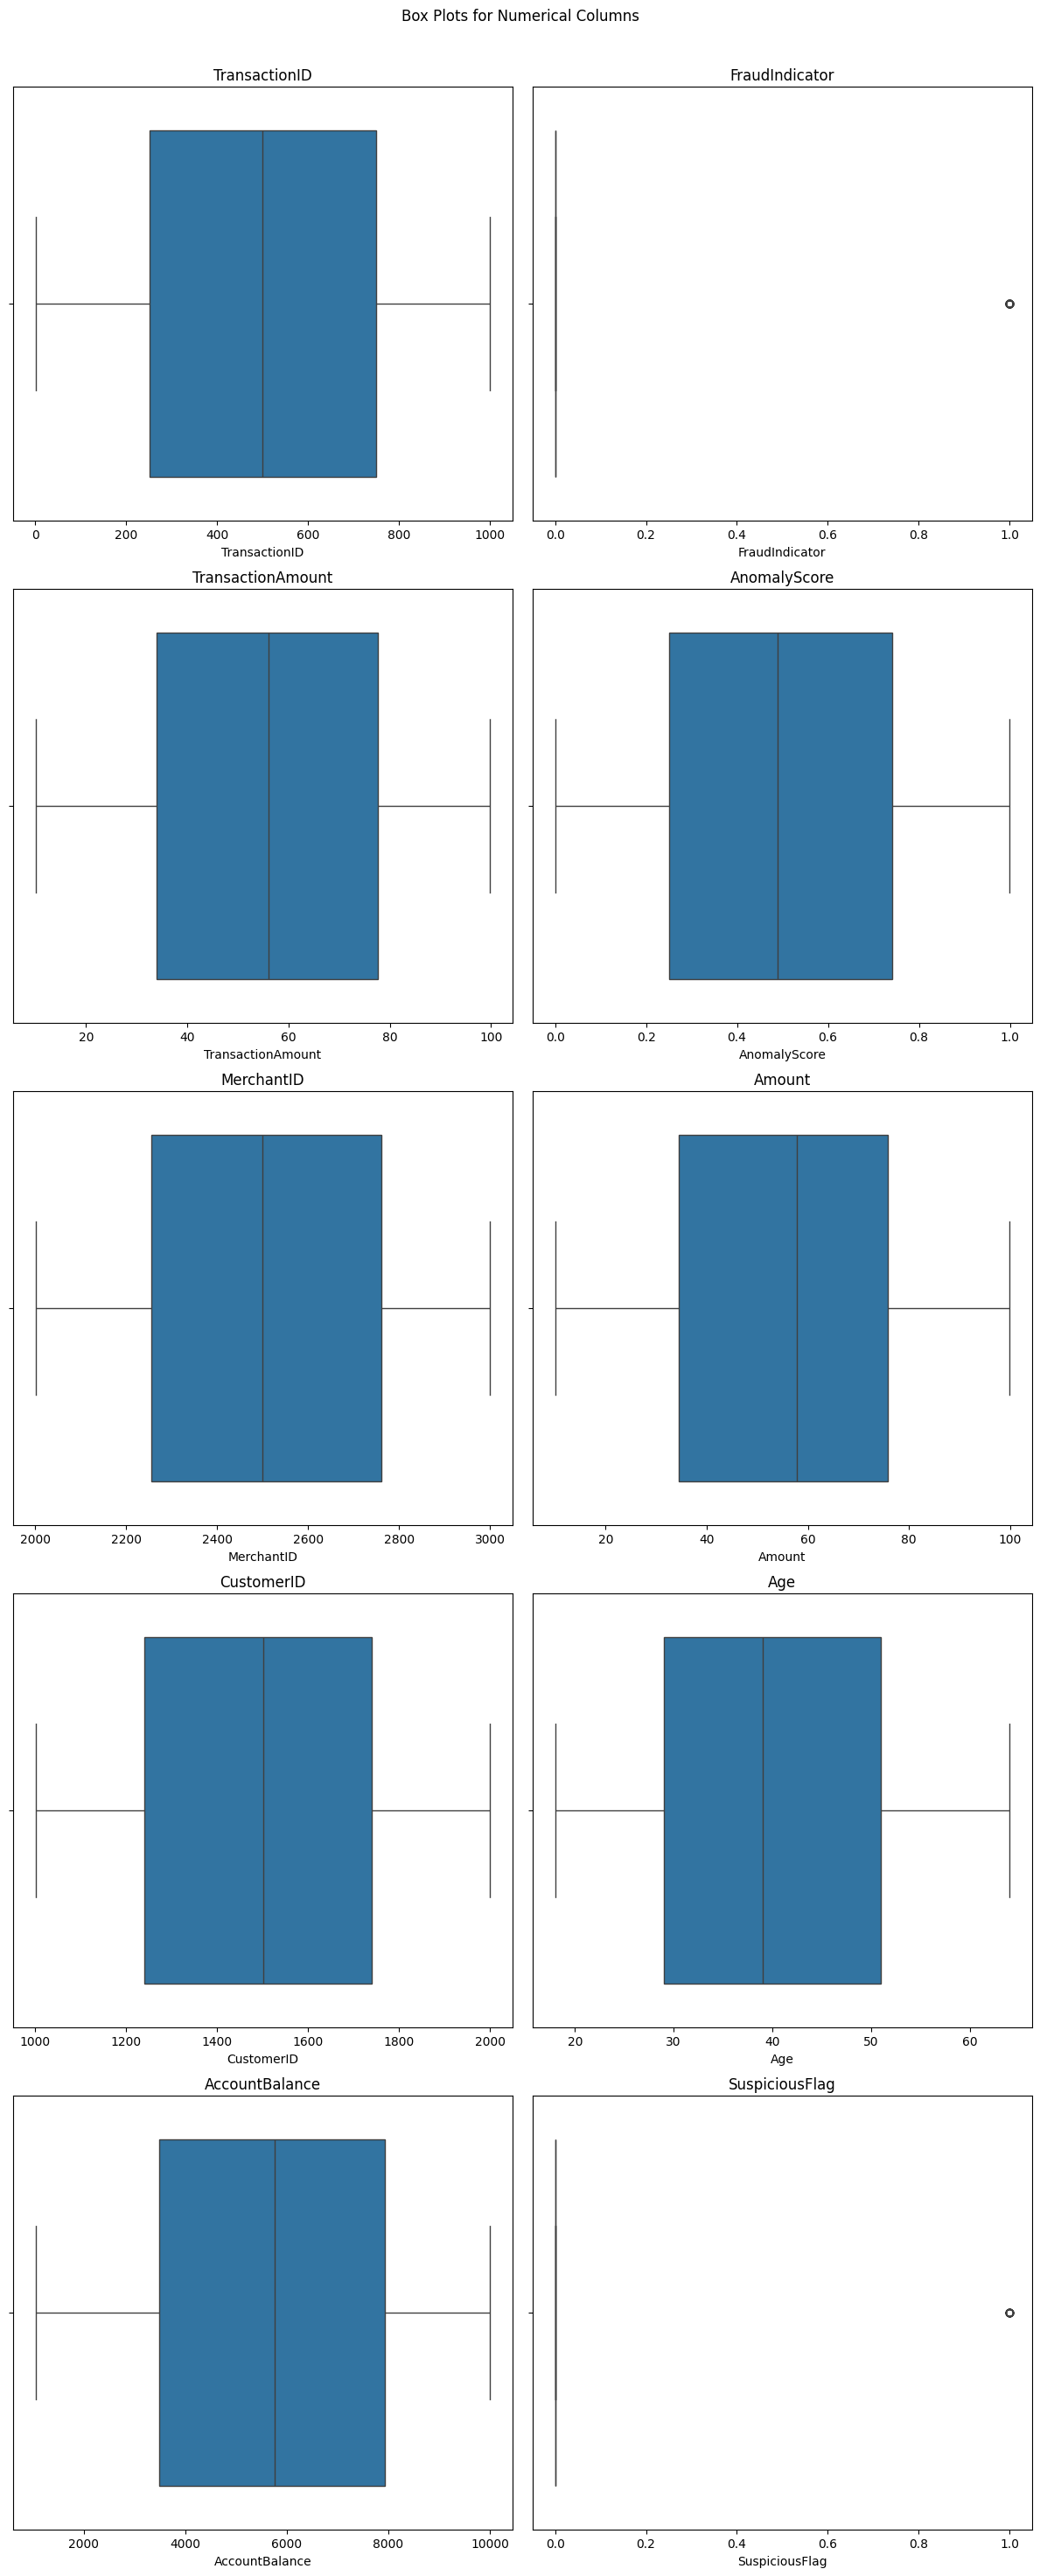

In [152]:
# Assuming 'data' is your DataFrame containing numerical columns

# Get the number of numerical columns
num_cols = len(data.select_dtypes(include=['number']).columns)

# Calculate the number of rows and columns for subplots
num_rows = (num_cols // 2) + (num_cols % 2)

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6*num_rows))
fig.suptitle("Box Plots for Numerical Columns")

# Loop through the numerical columns and create box plots
for i, column in enumerate(data.select_dtypes(include=['number']).columns):
    row = i // 2
    col = i % 2
    sns.boxplot(x=data[column], ax=axes[row, col])
    axes[row, col].set_title(column)

# Remove any empty subplots
if num_cols % 2 != 0:
    fig.delaxes(axes[num_rows-1, 1])

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust the position of the overall title
plt.show()

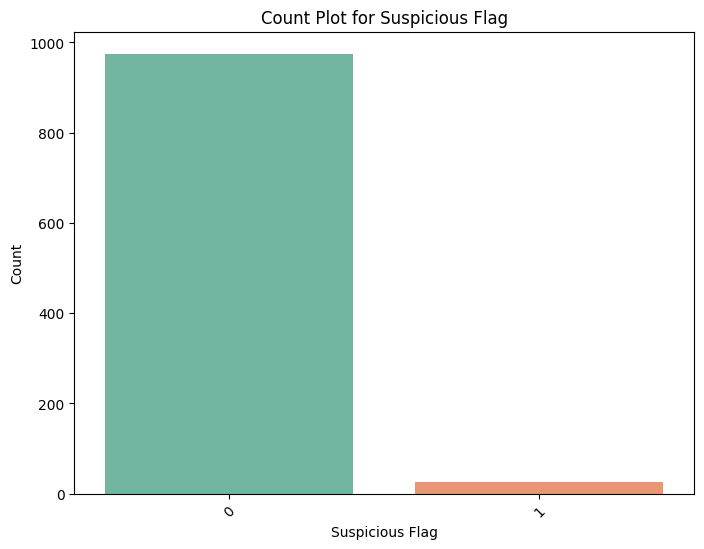

In [153]:
# We should use countplot for SuspiciousFlag feature

plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.countplot(x='SuspiciousFlag', data=data, palette='Set2')  # You can change the palette as desired
plt.title('Count Plot for Suspicious Flag')
plt.xlabel('Suspicious Flag')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if they are long

plt.show()

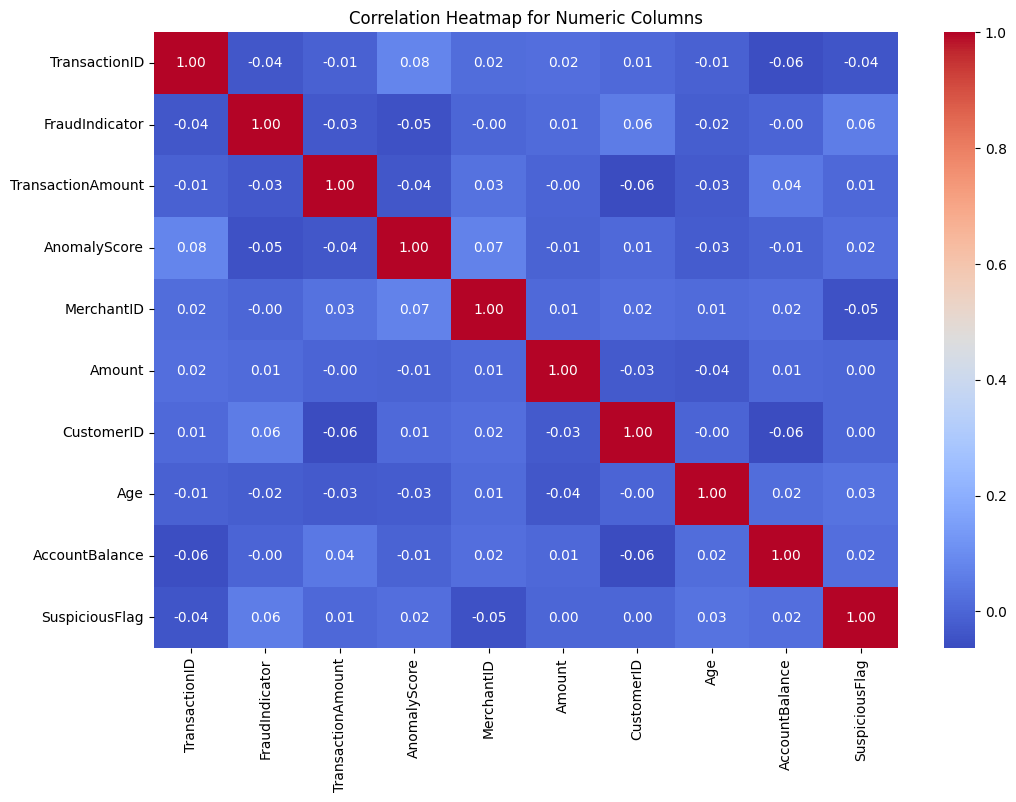

In [154]:

# Select only the numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numeric Columns')

plt.show()

**Feature Enginnering**

In [155]:
# Dropping the columns as of now they are not mush corelated & also wouldn't damper the performance of model
columns_to_be_dropped = ['TransactionID','MerchantID','CustomerID','Name', 'Age', 'Address']

In [156]:
data1 = data.drop(columns_to_be_dropped, axis=1)
data1.head()

,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,Amount,AccountBalance,LastLogin,SuspiciousFlag
0,0,Other,79.413607,0.686699,2022-01-01 00:00:00,55.530334,2869.689912,2024-08-09,0
1,0,Online,12.053087,0.081749,2022-01-01 01:00:00,12.881180,9527.947107,2022-01-27,0
2,0,Travel,33.310357,0.023857,2022-01-01 02:00:00,50.176322,9288.355525,2024-08-12,0
3,0,Travel,46.121117,0.876994,2022-01-01 03:00:00,41.634001,5588.049942,2024-03-06,0
4,0,Other,54.051618,0.034059,2022-01-01 04:00:00,78.122853,7324.785332,2024-08-03,0


In [157]:
data1['FraudIndicator'].value_counts(), data1['SuspiciousFlag'].value_counts(), data1['Category'].value_counts()

(FraudIndicator
 0    955
 1     45
 Name: count, dtype: int64,
 SuspiciousFlag
 0    975
 1     25
 Name: count, dtype: int64,
 Category
 Other     210
 Food      204
 Travel    198
 Online    196
 Retail    192
 Name: count, dtype: int64)

In [158]:
# Using Feature Engineering Creating two Columns
# Hour of Transaction = hour
# Gap between the day of transaction and last login in days = gap
if pd.api.types.is_datetime64_any_dtype(data['Timestamp']):
    print("The 'Timestamp' column is already in datetime format.")
else:
    print("The 'Timestamp' column is not in datetime format.")

The 'Timestamp' column is not in datetime format.


In [159]:
data1['Timestamp1'] = pd.to_datetime(data1['Timestamp'])

print(data1.dtypes)

FraudIndicator                int64
Category                     object
TransactionAmount           float64
AnomalyScore                float64
Timestamp                    object
Amount                      float64
AccountBalance              float64
LastLogin                    object
SuspiciousFlag                int64
Timestamp1           datetime64[ns]
dtype: object


In [160]:
data1['Hour'] = data1['Timestamp1'].dt.hour

In [161]:
data1['LastLogin'] = pd.to_datetime(data1['LastLogin'])

In [162]:
data1['gap'] = (data1['Timestamp1'] - data1['LastLogin']).dt.days.abs()

In [163]:
data1.head()

,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,Amount,AccountBalance,LastLogin,SuspiciousFlag,Timestamp1,Hour,gap
0,0,Other,79.413607,0.686699,2022-01-01 00:00:00,55.530334,2869.689912,2024-08-09,0,2022-01-01 00:00:00,0,951
1,0,Online,12.053087,0.081749,2022-01-01 01:00:00,12.881180,9527.947107,2022-01-27,0,2022-01-01 01:00:00,1,26
2,0,Travel,33.310357,0.023857,2022-01-01 02:00:00,50.176322,9288.355525,2024-08-12,0,2022-01-01 02:00:00,2,954
3,0,Travel,46.121117,0.876994,2022-01-01 03:00:00,41.634001,5588.049942,2024-03-06,0,2022-01-01 03:00:00,3,795
4,0,Other,54.051618,0.034059,2022-01-01 04:00:00,78.122853,7324.785332,2024-08-03,0,2022-01-01 04:00:00,4,945


In [164]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
df = data1

# Convert categorical variable 'Category' into numerical values
label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])

# Convert Timestamp columns to datetime and extract features
for col in ['Timestamp', 'LastLogin', 'Timestamp1']:
    df[col] = pd.to_datetime(df[col])
    df[col + '_Year'] = df[col].dt.year
    df[col + '_Month'] = df[col].dt.month
    df[col + '_Day'] = df[col].dt.day
    df[col + '_Hour'] = df[col].dt.hour
    df[col + '_Weekday'] = df[col].dt.weekday
    df.drop(columns=[col], inplace=True)  # Drop original timestamp column

# Define features (X) and target variable (y)
X = df.drop(columns=['FraudIndicator','Timestamp_Day'])  # Target variable
y = df['FraudIndicator']  # Target


# Ensure all features are numeric
print(X.dtypes)  # Check for non-numeric columns

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance scores
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
top_features = feature_importances.sort_values(by='Importance', ascending=False).head(10)

# Print top 10 features
print(top_features). #top 10 features that contribute most to fraud detection.

Category                int64
TransactionAmount     float64
AnomalyScore          float64
Amount                float64
AccountBalance        float64
SuspiciousFlag          int64
Hour                    int32
gap                     int64
Timestamp_Year          int32
Timestamp_Month         int32
Timestamp_Hour          int32
Timestamp_Weekday       int32
LastLogin_Year          int32
LastLogin_Month         int32
LastLogin_Day           int32
LastLogin_Hour          int32
LastLogin_Weekday       int32
Timestamp1_Year         int32
Timestamp1_Month        int32
Timestamp1_Day          int32
Timestamp1_Hour         int32
Timestamp1_Weekday      int32
dtype: object
              Feature  Importance
3              Amount    0.138470
4      AccountBalance    0.114142
2        AnomalyScore    0.113286
7                 gap    0.107455
1   TransactionAmount    0.091917
19     Timestamp1_Day    0.078327
14      LastLogin_Day    0.052318
13    LastLogin_Month    0.048458
16  LastLogin_Weekda